In [1]:
import os
os.chdir("..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2, keras

from glob import glob

from lib import *

%matplotlib inline

Using TensorFlow backend.


In [2]:
os.getcwd()

'/home/scarlet/Desktop/Python/InternshipTestTask/human_segmentation'

# Задача

**Требуется:** предложить модель, сегментирующую человека на фотографии.  
  
**Вход:** фотография 320x240x3.  
**Выход:** маска человека 320x240.  
**Метрика:** [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient).  
  
  
Данные представляют из себя набор фотографий человека и маски, определяющей положение человека на фотографии.  
Доступные данные разделены на несколько папок:  
- `train` содержит фотографии 320x240x3;
- `train_mask` содержит маски для фотографий из `train` 320x240;
- `valid` содержит фотографии 320x240x3;
- `valid_mask` содержит маски для фотографий из `valid` 320x240;
- `test` содержит фотографии 320x240x3.  
  
Для лучшей модели требуется создать 2 файла, которые необходимы для валидации Вашего решения:  
- сохраненные маски для картинок из `valid` в формате `pred_valid_template.csv`;
- html страницу с предсказанием модели для всех картинок из `test` и папку с используемыми картинками в этой html странице.  
  
Также необходимо:
- подготовить код для проверки (докстринги, PEP8);
- создать отчет (можно прямо в ноутбуке) с описанием Вашего исследования, гипотез и т.п.

Примеры приведены ниже.

---

# Данные, метрики и доступные функции

Посмотрим на данные:

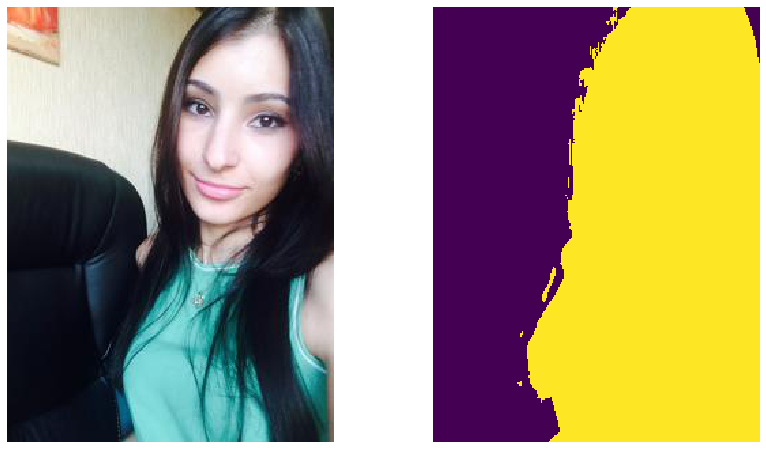

In [3]:
path = "data/train"
images = os.listdir(path)
ind = np.random.choice(images).split(".")[0]

img = np.array(Image.open(f"{path}/{ind}.jpg"))
mask = np.array(Image.open(f"{path}_mask/{ind}.png"))
show_img_with_mask(img, mask)

Пример подсчета метрики:

In [4]:
random_mask = np.random.randint(low=0, high=2, size=mask.shape)
get_dice(mask, random_mask)

0.5422065127831573

Можно для последовательности масок вычислить среднее значение метрики:

In [5]:
random_masks_1 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
random_masks_2 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
get_dice(random_masks_1, random_masks_2)

0.5007043118678396

Пример использования функций `encode_rle` и `decode_rle`:
1. Функция `encode_rle` используется для кодирования маски в строку для последующей записи в файл;
2. Функция `decode_rle` используется для восстановления маски по закодированной строке.

In [6]:
rle_mask = encode_rle(mask)
rle_mask

'133 4 146 83 373 3 385 85 613 1 615 1 624 86 863 87 1095 1 1103 88 1333 1 1335 1 1343 88 1573 1 1575 1 1582 90 1811 5 1820 92 2051 5 2059 94 2291 5 2297 96 2528 3 2532 2 2535 1 2537 96 2768 2 2772 2 2777 97 3009 1 3012 2 3017 97 3253 1 3256 98 3493 1 3495 100 3733 1 3735 100 3973 102 4213 103 4452 104 4690 106 4929 107 5169 108 5406 111 5646 1 5648 109 5888 110 6127 111 6362 1 6365 1 6367 111 6602 1 6604 114 6842 1 6844 114 7076 1 7082 1 7085 113 7316 1 7319 1 7321 2 7324 115 7556 1 7558 3 7562 1 7564 115 7796 1 7798 2 7801 2 7804 115 8036 1 8038 2 8042 117 8276 1 8278 3 8282 117 8518 3 8522 117 8758 2 8761 118 8998 2 9001 119 9239 121 9479 121 9719 121 9959 122 10199 122 10439 122 10676 1 10679 122 10912 6 10919 122 11150 131 11389 132 11629 132 11869 132 12108 133 12348 133 12589 132 12828 3 12832 129 13068 1 13072 129 13308 1 13312 129 13548 2 13552 129 13788 2 13792 129 14032 1 14035 126 14274 127 14514 127 14754 127 14994 127 15233 128 15473 128 15709 1 15713 128 15949 1 15952 12

Теперь восстановим маску:

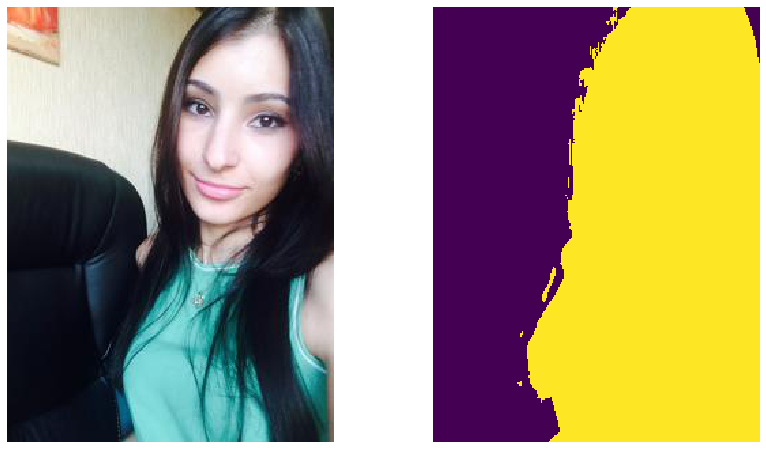

In [7]:
decoded_mask = decode_rle(rle_mask)
show_img_with_mask(img, decoded_mask)

---

# Результаты

Пример файла для изображений из `data/valid`:  
_Каждую предсказанную маску для изображения из `valid` необходимо закодировать и записать в показанный ниже файл, который служит примером, именно в таком виде нужно будет представить результат Вашего лучшего решения на данных из `valid`._

In [8]:
pred = pd.read_csv("data/pred_valid_template.csv")
pred.head()

,id,rle_mask
0,1315,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
1,1316,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
2,1317,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
3,1318,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
4,1319,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...


Для данных из `test` требуется создать html страницу + картинки для нее.  
Это можно сделать с помощью функции `get_html`, как показано ниже.

In [9]:
paths_to_imgs = sorted(glob("data/valid/*"))
#print(paths_to_imgs)
pred_masks = [np.array(Image.open(path)) for path in sorted(glob("data/valid_mask/*"))]

_ = get_html(paths_to_imgs, pred_masks, path_to_save="results/example")

В папке `results` создался файл `example.html` и папка `examples` с используемыми картинками.

************************

# Решение задачи


Перед тем как приступить к задаче проведем анализ статей и учебных материалов по смежным темам, а именно:  
* Статья по Unet: https://arxiv.org/pdf/1505.04597.pdf
* Статья по SegNet: https://arxiv.org/pdf/1511.00561.pdf
* Видео лекция Deep Learning School по сегментации: https://www.youtube.com/watch?v=OWK8VlgJM4I
* Статья по библиотке albumentations: https://medium.com/the-artificial-impostor/custom-image-augmentation-with-keras-70595b01aeac

В результате было решено придерживаться  следующего подхода:  
1. Использовать pre-trained модель, ввиду ограниченных вычислительных ресурсов
2. Для упрощения работы с сегментационными моделями(подбор backbone для них) установить библиотеку Segmentation Models (https://github.com/qubvel/segmentation_models)
3. Для упрощения работы по аугментации данных использовать библиотеку albumentations (https://github.com/albu/albumentations)
4. Для предложенной задачи попробовать две архитектуры сетей: SegNet и Unet с различными backbone

# Препроцессинг и анализ данных

Посмотрим на размеры датасетов, убедимся, что количество изображений соответствует количеству масок:

In [10]:
#path = "data/train"

train_files = [f for f in glob('data/train' + "**/*.jpg", recursive=True)]
train_masks = [f for f in glob('data/train_mask' + "**/*.png", recursive=True)]
valid_files = [f for f in glob('data/valid' + "**/*.jpg", recursive=True)]
valid_masks = [f for f in glob('data/valid_mask' + "**/*.png", recursive=True)]
test_files = [f for f in glob('data/test' + "**/*.jpg", recursive=True)]
print("Size of train datasest: " + str(len(train_files)) + " images and " + str(len(train_masks)) + " masks")
print("Size of validation datasest: " + str(len(valid_files)) + " images and " + str(len(valid_masks)) + " masks")
print("Size of test datasest: " + str(len(test_files)) + " images")

Size of train datasest: 1315 images and 1315 masks
Size of validation datasest: 145 images and 145 masks
Size of test datasest: 100 images


Видно, что датасет для тренировки не слишком большой. Стоит воспользоваться аугментацией данных.  
Посмотрим на размеры изображений и масок:

In [11]:
train_path = "data/train"
val_path = "data/valid"
ind = 1
img = np.array(Image.open(f"{path}/{ind}.jpg"))
mask = np.array(Image.open(f"{path}_mask/{ind}.png"))
print("Image size is: " + str(img.shape[0]) + "x" + str(img.shape[1]) + "x" + str(img.shape[2]))
print("Mask size is:  " + str(mask.shape[0]) + "x" + str(mask.shape[1]) + "x1")
print("Each pixel in image belongs to [" + str(np.min(img)) + ", " + str(np.max(img)) + "]")
print("Each pixel in mask belongs to  [" + str(np.min(mask)) + ", " + str(np.max(mask)) + "]")

Image size is: 320x240x3
Mask size is:  320x240x1
Each pixel in image belongs to [0, 255]
Each pixel in mask belongs to  [0, 255]


Создадим трейновый датафрейм с масками и номерами изображений. В дальнейшем он потребуется для генератора.

In [12]:
train_masks.sort()
train_files.sort()
valid_masks.sort()
valid_files.sort()

In [13]:
train_df = pd.DataFrame(columns = ['img' , 'mask_rle'])
for i in range(len(train_files)):
    index = train_files[i].split("/")[2].split('.')[0]
    train_df.loc[i] = [index, encode_rle(np.array(Image.open(f"{train_path}_mask/{index}.png")))]

#print(train_df)

In [14]:
val_df = pd.DataFrame(columns = ['img' , 'mask_rle'])
for e in valid_files:
    index = e.split("/")[2].split('.')[0]
    val_df.loc[index] = [index, encode_rle(np.array(Image.open(f"{val_path}_mask/{index}.png")))]

Убедимся что датафрейм составлен правильно:

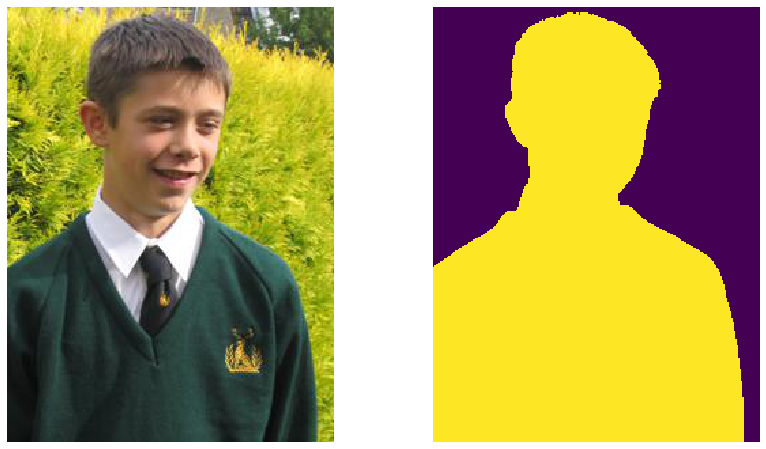

In [15]:
import random
ind = random.randint(0,1000)
decoded_mask = decode_rle(train_df.loc[ind][1])
show_img_with_mask(np.array(Image.open(f"{train_path}/{train_df.loc[ind][0]}.jpg")), decoded_mask)

In [35]:
def keras_generator(gen_df, batch_size, preprocess_input):
    while True:
        x_batch = []
        y_batch = []
        
        for i in range(batch_size):
            img_name, mask_rle = gen_df.sample(1).values[0]
            img = np.array(Image.open(f"{train_path}/{img_name}.jpg")) #cv2.imread(f"{train_path}/{img_name}.jpg")
            mask = decode_rle(mask_rle)
            
            
            img = preprocess_input(img)
            mask = cv2.resize(mask, (256, 256))
            
            
            x_batch += [img]
            y_batch += [mask]

        x_batch = np.array(x_batch) / 255.
        y_batch = np.array(y_batch)

        yield x_batch, np.expand_dims(y_batch, -1)

In [36]:
for x, y in keras_generator(train_df, 16, preprocess_input):
    break

In [37]:
x.shape

(16, 320, 240, 3)

# Unet with resnet34

In [38]:
import segmentation_models as sm
from segmentation_models import unet

BACKBONE = 'resnet34'
preprocess_input = sm.backbones.get_preprocessing(BACKBONE)

In [39]:
# load your data
#x_train, y_train, x_val, y_val = load_data(...)

In [40]:
# preprocess input
#x_train = preprocess_input(x_train)
#x_val = preprocess_input(x_val)

In [41]:
# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet')
model.compile(
    'Adam',
    loss=sm.losses.dice_loss,
    metrics=[sm.metrics.iou_score],
)

In [42]:
best_w = keras.callbacks.ModelCheckpoint('fcn_best.h5',
                                monitor='val_loss',
                                verbose=0,
                                save_best_only=True,
                                save_weights_only=True,
                                mode='auto',
                                period=1)

last_w = keras.callbacks.ModelCheckpoint('fcn_last.h5',
                                monitor='val_loss',
                                verbose=0,
                                save_best_only=False,
                                save_weights_only=True,
                                mode='auto',
                                period=1)


callbacks = [best_w, last_w]

In [ ]:
# fit model
# if you use data generator use model.fit_generator(...) instead of model.fit(...)
# more about `fit_generator` here: https://keras.io/models/sequential/#fit_generator
batch_size = 16
model.fit_generator(keras_generator(train_df, batch_size),
              steps_per_epoch=10,
              epochs=3,
              verbose=1,
              callbacks=callbacks,
              validation_data=keras_generator(val_df, batch_size),
              validation_steps=50,
              class_weight=None,
              max_queue_size=10,
              workers=1,
              use_multiprocessing=False,
              shuffle=True,
              initial_epoch=0)

Epoch 1/3
